In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("salary_data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
X = df[["YearsExperience"]]
y = df["Salary"]

In [7]:
X.head(3)

,YearsExperience
0,1.1
1,1.3
2,1.5


In [8]:
y.head(2)

0    39343.0
1    46205.0
Name: Salary, dtype: float64

In [9]:
colors = random.sample(range(1, 100), len(X))

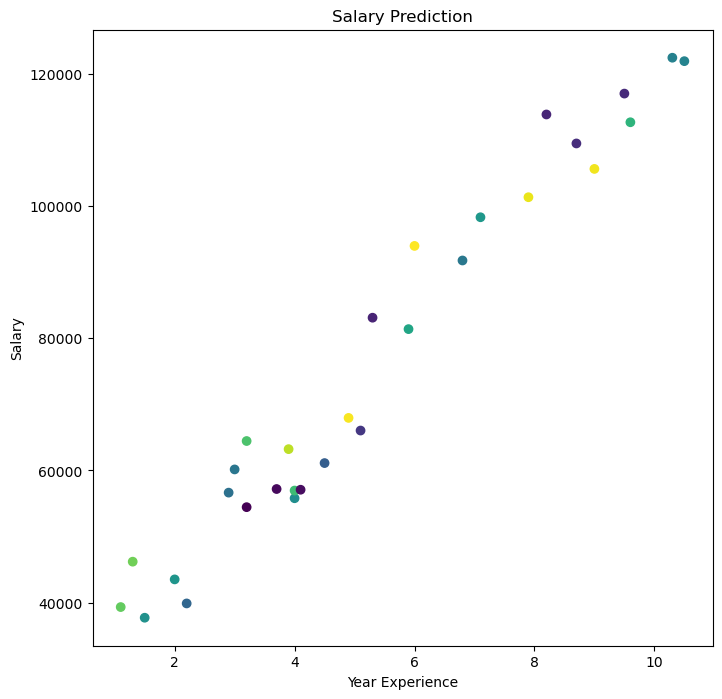

In [10]:
plt.figure(figsize = (8, 8))
plt.scatter(X, y, c = colors, cmap="viridis")
plt.title("Salary Prediction")
plt.xlabel("Year Experience")
plt.ylabel("Salary")
plt.show()

## Data Train Test

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [14]:
len(xtrain)

21

In [15]:
len(xtest)

9

In [17]:
xtrain.head(5)

,YearsExperience
17,5.3
22,7.9
11,4.0
4,2.2
29,10.5


In [18]:
ytrain.head(5)

17     83088.0
22    101302.0
11     55794.0
4      39891.0
29    121872.0
Name: Salary, dtype: float64

# Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
reg = LinearRegression()

In [24]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [30]:
ypredict = reg.predict(xtest)

In [54]:
c = [i for i in range (1,len(ytest)+1, 1)]

In [55]:
c

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [56]:
ytest

9      57189.0
26    116969.0
28    122391.0
13     57081.0
5      56642.0
12     56957.0
27    112635.0
25    105582.0
6      60150.0
Name: Salary, dtype: float64

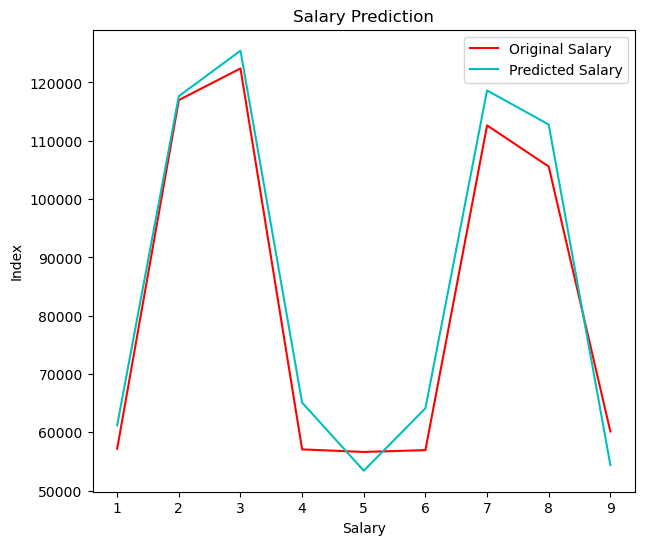

In [66]:
plt.figure(figsize = (7, 6))
plt.plot(c, ytest, color = "r")
plt.plot(c, ypredict, color = "c")
plt.title("Salary Prediction")
plt.xlabel("Salary")
plt.ylabel("Index")
plt.legend(["Original Salary", "Predicted Salary"])
plt.show()

### Plotting the ERROR


In [61]:
error_data = ytest - ypredict
print(error_data)

9    -4019.341988
26    -680.324249
28   -3043.287320
13   -8019.823523
5     3218.621083
12   -7170.703139
27   -5987.444633
25   -7201.722330
6     5753.500699
Name: Salary, dtype: float64


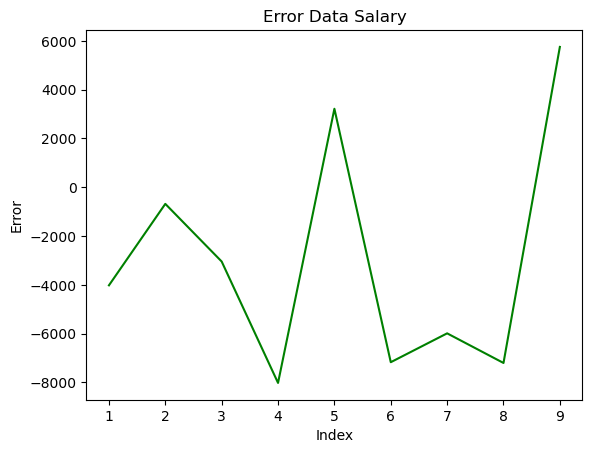

In [72]:
# plotting the error

d = [1 for i in range(1, len(ytest)+1, 1)]
plt.plot(c, error_data, color = "g")
plt.title("Error Data Salary")
plt.xlabel("Index")
plt.ylabel("Error")
plt.show()

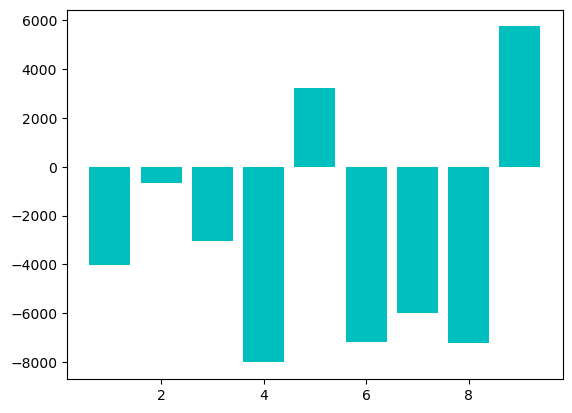

In [74]:
plt.bar(c, error_data, color="c")
plt.show()

### Importing Metrics for the evaluation of the model

In [78]:
from sklearn.metrics import r2_score, mean_squared_error

In [81]:
# calculate the mean square error

mean_SE = mean_squared_error(ytest, ypredict)

In [82]:
mean_SE

30310299.043402452

In [90]:
# calculation r-square value
rscore = r2_score(ytest, ypredict)

In [91]:
rscore

0.9627668685473267

In [104]:
print(f"Mean Squared Value : {mean_SE}\nr score Value : {rscore}")

Mean Squared Value : 30310299.043402452
r score Value : 0.9627668685473267


### Ploting actual value and predicted value for more insights

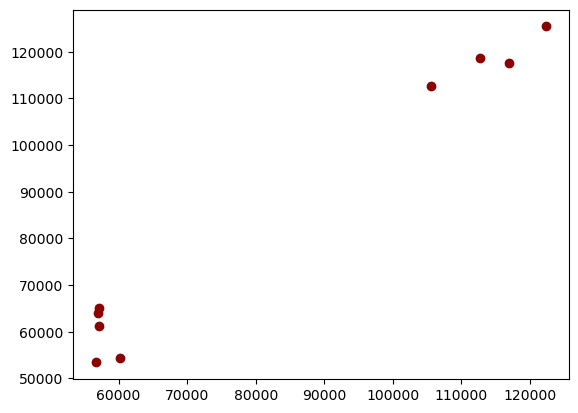

In [120]:
plt.scatter(ytest, ypredict, c="darkred")
plt.show()

### Intercept and Coefficient of the line

In [122]:
print(f"Intercept {reg.intercept_}")
print(f"Coefficient {reg.coef_}")

Intercept 25202.887786154883
Coefficient [9731.20383825]
